In [1]:
from TwinNeuralNetwork import TNNR, ANNR
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def_func = lambda a: lambda x: x**3 - a*x

In [4]:
%%time

seed = 39122
a = -80
n = 100

annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
               mdl_wts_file='annr64_n500_inverse_a' + str(a))
annr_64.rmse_test

2023-06-09 16:00:30.674288: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 55.3 s, sys: 8.45 s, total: 1min 3s
Wall time: 43.6 s


60.32107650351906

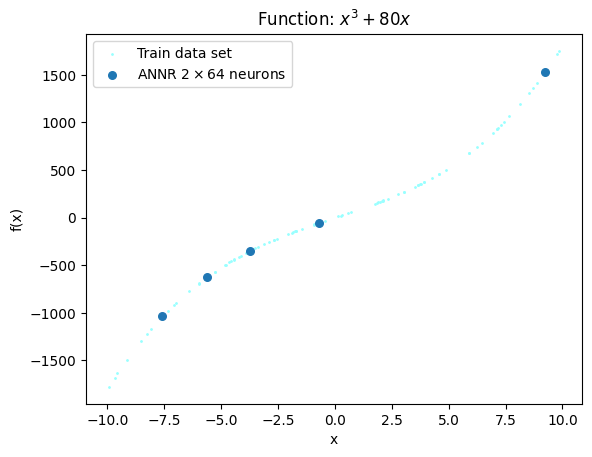

In [5]:
plt.scatter(annr_64.cn_transformer.inverse_transform_x(annr_64.x_train_single), 
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(annr_64.x_pred_test,
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_test_single),
            label='ANNR $2\\times 64$ neurons', s=30)
plt.title('Function: $x^3 + 80x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [24]:
%%time

seed = 392
a = 30
n = 500

tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
               mdl_wts_file='tnnr64_n500_inverse_a' + str(a))
tnnr_64.rmse_test

CPU times: user 2min 46s, sys: 32.4 s, total: 3min 18s
Wall time: 2min 5s


1.8645884621113125

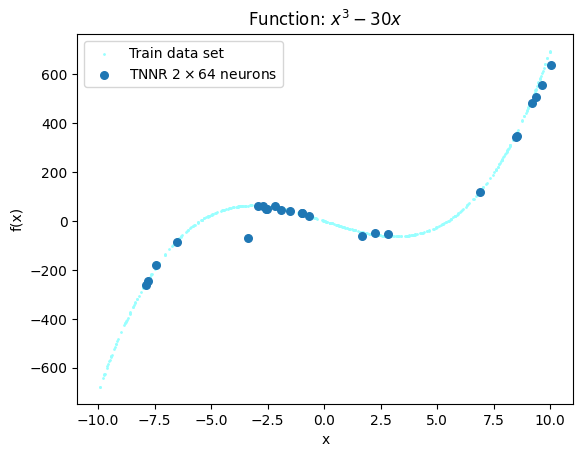

In [25]:
plt.scatter(tnnr_64.cn_transformer.inverse_transform_x(tnnr_64.x_train_single), 
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_64.x_pred_test,
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_test_single),
            label='TNNR $2\\times 64$ neurons', s=30)
plt.title('Function: $x^3 - 30x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [27]:
%%time

seed = 392
a = 30
n = 500

tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
               mdl_wts_file='tnnr64_n500_inverse_a' + str(a))
tnnr_64.rmse_test

CPU times: user 2min 7s, sys: 25 s, total: 2min 32s
Wall time: 1min 40s


2.506788799651903

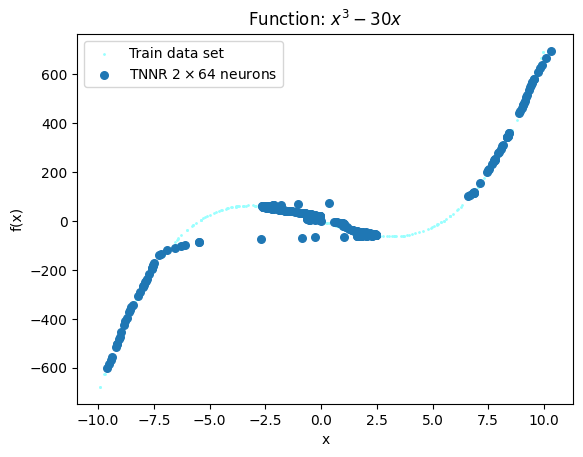

In [28]:
plt.scatter(tnnr_64.cn_transformer.inverse_transform_x(tnnr_64.x_train_single), 
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_64.x_pred_test,
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_test_single),
            label='TNNR $2\\times 64$ neurons', s=30)
plt.title('Function: $x^3 - 30x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [29]:
%%time

seed = 392
a = 30
n = 500

annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
               mdl_wts_file='annr64_n500_inverse_a' + str(a))
annr_64.rmse_test

CPU times: user 39.4 s, sys: 6.98 s, total: 46.3 s
Wall time: 30.9 s


48.92026078441794

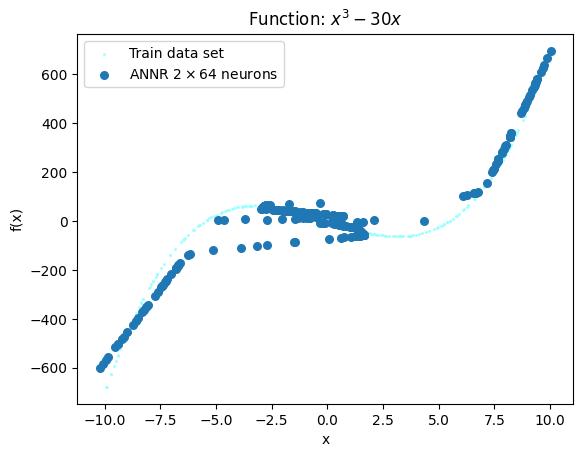

In [33]:
plt.scatter(annr_64.cn_transformer.inverse_transform_x(annr_64.x_train_single), 
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(annr_64.x_pred_test,
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_test_single),
            label='ANNR $2\\times 64$ neurons', s=30)
plt.title('Function: $x^3 - 30x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

-----------

In [6]:
annr_64

In [7]:
with open('sample.txt', 'w') as f:
    f.write('dict = ' + str(annr_64) + '\n')  

In [8]:
import pickle

In [9]:
with open('sample.txt', 'wb') as f:
    pickle.dump(annr_64, f)   

AttributeError: Can't pickle local object '<lambda>.<locals>.<lambda>'

In [10]:
import json

In [13]:
json_str = json.dumps(annr_64.__dict__, indent=4)

TypeError: Object of type function is not JSON serializable

In [32]:
vars(annr_64)

{'f': <function __main__.<lambda>.<locals>.<lambda>(x)>,
 'n_vars': 1,
 'batch_size': 16,
 'epochs': 10000,
 'l2': 0.0,
 'n': 500,
 'val_pct': 0.05,
 'test_pct': 0.5,
 'learning_rate': 1,
 'verbosity': 0,
 'neurons': 64,
 'inverse_problem': True,
 'mdl_wts_file': 'annr64_n500_inverse_a30',
 'mdl_plot_file': None,
 'show_summary': False,
 'show_loss_plot': False,
 'show_rmse': False,
 'cn_transformer': <TwinNeuralNetwork.CenterAndNorm at 0x2b8cad330>,
 'model': <keras.engine.functional.Functional at 0x29c5f7fa0>,
 'x_train_single': array([[-4.02542286e-01],
        [ 9.35884339e-01],
        [-4.22919436e-01],
        [-8.49840672e-01],
        [ 8.53236627e-01],
        [-8.32885327e-01],
        [-4.57439123e-01],
        [ 8.31351659e-01],
        [ 3.43855016e-01],
        [ 7.51592014e-01],
        [-1.06797691e+00],
        [-5.98416938e-01],
        [-8.72258215e-03],
        [ 9.01765031e-01],
        [ 8.74999558e-01],
        [ 1.86519189e-01],
        [ 6.95675494e-01],
     